In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

[1.4329792912729316, 1.1985341500895599, 1.184057159655058, 1.1697719230825019, 1.141756852041366, 1.128017563136086, 1.114451100061426, 1.101053168840172, 1.0878196335637027, 1.0747465087275787, 1.0618299520261094, 1.0490662575733085, 1.0364518495203134, 1.0239832760417644, 1.0116572036658438, 1.0116572036658438, 0.9994704119246715, 0.987419788303581, 0.9755023234694583, 0.9755023234694583, 0.9637151067598426, 0.9637151067598426, 0.9520553219158775, 0.9405202430434538, 0.9405202430434538, 0.9405202430434538, 0.9291072307880663, 0.9291072307880663, 0.9178137287099492, 0.9178137287099492, 0.9178137287099492, 0.9066372598470384, 0.9066372598470384, 0.9066372598470384, 0.9066372598470384, 0.8955754234542014, 0.8955754234542014, 0.8955754234542014, 0.8955754234542014, 0.8955754234542014, 0.8955754234542014, 0.8846258919079987, 0.8846258919079987, 0.8846258919079987, 0.8846258919079987, 0.8846258919079987, 0.8846258919079987, 0.8846258919079987, 0.8846258919079987, 0.8846258919079987, 0.884

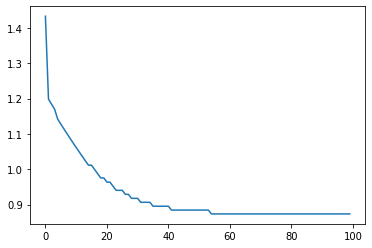

In [4]:
w_values=[]
error_rate=[]
def Linear(w):
    data=pd.read_csv('/AIMLJCOMPNENT.csv')
    data_x=data.iloc[:,0:15]
    data_y=data.iloc[:,15]
    data_x=data_x.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)
    data_x.insert(0,'w0',1)
    x=np.array(data_x)
    y=np.array(data_y)
    #print(data_x)
    #print(data_y)
    y_predict=[]
    for i in range(0,309):
        c=0
        for j in range(0,len(w)):
            c+=w[j]*x[i][j]
        y_predict.append(c)
        w_values.append(w)
    y_f_x=[]
    for i in range(0,309):
        den=(1+math.exp(-y_predict[i]))
        val=1/den
        y_f_x.append(round(val,2))
    j_theta=[]
    for i in range(0,309):
        if (y_f_x[i]!=0):
            j_theta.append((y[i]*np.log2(y_f_x[i]))+(1-y[i])*(1-np.log2(y_f_x[i])))
        else:
            j_theta.append(0)
    j_t_sum=np.array(j_theta).mean()
      # print(round(j_t_sum,3))
    error_rate.append(j_t_sum)
    y_grad=[]
    for j in range(0,16):
        x_g=0
        for i in range(0,309):
            x_g+=(x[i][j]*(y[i]-y_f_x[i]))
        y_grad.append(x_g)
    new_y=[]
    for j in range(0,16):
        new_y.append(round(w[j]-(0.1)*(1/303)*y_grad[j],4))
        return new_y
w=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
for i in range(100):
    w=Linear(w)
print(error_rate)
z=np.array(error_rate).min()
index=error_rate.index(z)
print(w_values[index])
print(index)
#min value 0.8737864077669902
iter=np.arange(100)
plt.plot(iter,error_rate)